<ins>Note
The exercises in this course will have an associated charge in your AWS account. In this exercise, you create the following resources:

* AWS Identity and Access Management (IAM) policy and user (Policies and users are AWS account features, offered at no additional charge)
* Amazon Simple Storage Service (Amazon S3) bucket, with the dragons data
* AWS Systems Manager Parameter Store parameters
* AWS Cloud9 integrated development environment (IDE)
The final exercise includes instructions to delete all the resources that you create in the exercises.

Familiarize yourself with Amazon S3 pricing, AWS Systems Manager pricing, AWS Cloud9 pricing, and the AWS Free Tier. </ins>

## Exercise 1: Setting Up and Exploring the SDK

In this exercise, you install and configure the AWS Command Line Interface (AWS CLI) and the AWS SDK for Python (Boto3). After you install the necessary requirements, you create an S3 bucket and deploy a web application to the bucket. You then set up data in Amazon S3, and configure AWS Systems Manager parameters for the Dragons application. After you create all the resources, you explore the Python application.

If you choose to use a local IDE instead of an AWS Cloud9 instance, you can follow the optional steps on Local IDE Prerequisites (https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/exercise-1-localide.html).

You will want to run the steps in the US East (N. Virginia) us-east-1 Region.

## Task 1: Creating an AWS Cloud9 environment

For this task, you will create an AWS Cloud9 environment, which you will use as your development environment throughout the exercises.

1. In the AWS Management Console, choose Services, and then search for and open Cloud9.

2. Choose Create environment.

3. For Name, enter `Python-DevEnv`.

4. Leave the default settings, and choose Create. It might take a few minutes for the environment to be created.

5. In the AWS Cloud9 (or local IDE terminal), install the SDK for Python:
   
    `pip install boto3`

### Task 2: Creating an S3 bucket

In this task, you will create an S3 bucket. This bucket will store the web application frontend. AWS Command Line Interface (AWS CLI) commands are supplied for use in your AWS Cloud9 or local IDE terminal. To perform the same steps with the SDK, see the appendix.

1. In the AWS Cloud9 or the local IDE terminal, run the following commands. The first command prompts you to enter a unique bucket name. For example, you could combine your initials and -dragons-app to create a bucket name (such as hjs-dragons-app). This command also saves your bucket name as an environment variable. Then, the second command creates a bucket.

    Ensure that you run the steps in the US East (N. Virginia) us-east-1 Region.

    First, create a bucket name and save the bucket name as an environment variable.

    ```echo "Please enter a bucket name: "; read bucket;  export MYBUCKET=$bucket```
    
    Then, create the bucket.

    ```aws s3 mb s3://$MYBUCKET```
    
    If your bucket name isn’t unique, you will see an error message. Continue running the command and entering a new bucket name until you have successfully created a bucket.

2. After the bucket is created, make the environment variable available in future exercises by adding an entry to your .bashrc:
   
    ```echo "export MYBUCKET=$MYBUCKET" >> ~/.bashrc```

3. List the buckets in your account and confirm that the newly created bucket is in the response.
   
    ```aws s3 ls```

For more information about the SDK syntax, see List existing buckets (https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-example-creating-buckets.html) in the Boto3 Docs documentation.

For more information about AWS CLI commands, see the AWS CLI Command Reference (https://docs.aws.amazon.com/cli/latest/index.html).

### Task 3: Deploying a web application to the S3 bucket

In this task, you will deploy a simple web application to the S3 bucket. Amazon S3 will become the web server for your static website, which includes HTML, images, and client-side scripts. AWS CLI instructions for copying the web application are supplied.

1. In the AWS Cloud9 or local IDE terminal, download and extract the web application.

    ```wget https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/downloads/webapp1.zip```

    ```unzip webapp1.zip -d ~/webapp1```

2. Copy all the contents of the webapp1 folder to Amazon S3.

    ```aws s3api put-bucket-ownership-controls --bucket $MYBUCKET --ownership-controls 'Rules=[{ObjectOwnership=BucketOwnerPreferred}]'```

    ```aws s3api put-public-access-block --bucket $MYBUCKET --public-access-block-configuration "BlockPublicAcls=false,IgnorePublicAcls=false,BlockPublicPolicy=false,RestrictPublicBuckets=false"```

    ```aws s3 cp ~/webapp1 s3://$MYBUCKET/dragonsapp/ --recursive --acl public-read```

3. To find the URL for the web application, run the following AWS CLI command.

    ```echo "URL: https://$MYBUCKET.s3.amazonaws.com/dragonsapp/index.html"```

4. Visit the web application (which is hosted on Amazon S3) by copying the URL output into a browser window.

5. Confirm that your web application works. It will look similar to the following screen capture.
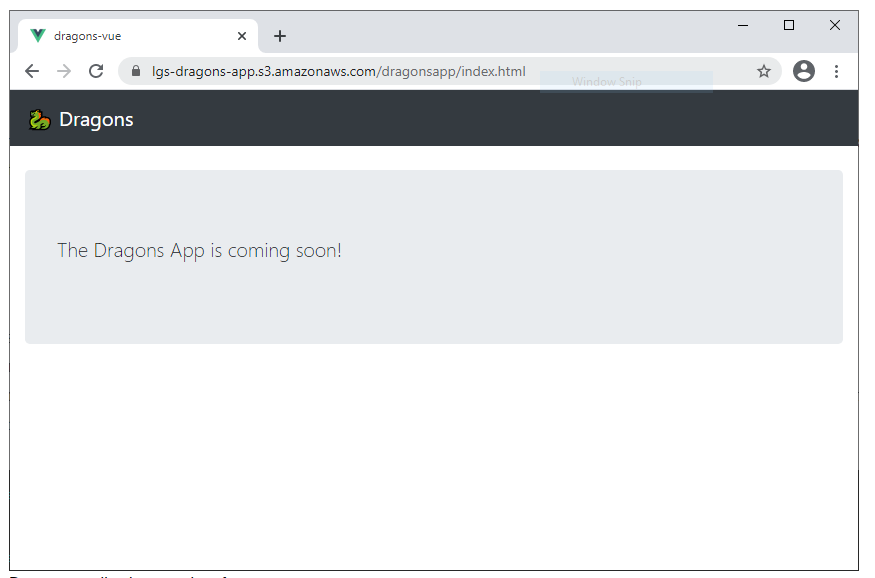
  
6. In your browser, bookmark this application because you will return to it in future exercises.

### Task 4: Setting up the Dragons application

In this task, you will create resources that the Dragons application will use. You will download the file that contains the dragons data in JavaScript Object Notation (JSON) format, and upload this data to your S3 bucket. Then, you will create two parameters for Systems Manager. The console application that you create after this section uses the dragons data for querying, and it uses the parameters for configuration.

1. Download the source of the dragons data: <b>dragon_stats_one.txt</b>.
   
    `wget https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/downloads/dragon_stats_one.txt`

3. Copy the dragons data in dragon_stats_one.txt to the root of the S3 bucket.

    ```aws s3 cp dragon_stats_one.txt s3://$MYBUCKET```

4. Confirm that the data populated the S3 bucket. You should see the dragonsapp/ prefix and a dragon_stats_one.txt object, in addition to the other objects in the bucket.

    ```aws s3 ls s3://$MYBUCKET```

5. Set the Parameter Store value for dragon_data_bucket_name.

```
aws ssm put-parameter \
--name "dragon_data_bucket_name" \
--type "String" \
--overwrite \
--value $MYBUCKET
```

5. Set the Parameter Store value for the dragon_data_file_name.

```
aws ssm put-parameter \
--name "dragon_data_file_name" \
--type "String" \
--overwrite \
--value dragon_stats_one.txt
```

### Task 5: Exploring the console application
In this task, you will explore the console application.

1. Download and extract the console application, which is a Python file.

    `wget https://aws-tc-largeobjects.s3.amazonaws.com/DEV-AWS-MO-BuildingRedux/downloads/app.py`

2. Open the `app.py` file to see how it uses the Systems Manager parameters to retrieve the bucket name and file name.

3. You can run the file to get some dragon data from dragon_data_file_name.

    `python3 app.py`

It should return some JSON output that’s similar to the following:

```
{"description_str":"From the northern fire tribe, Atlas was born from the ashes of his fallen father in combat. He is fearless and does not fear battle.","dragon_name_str":"Atlas","family_str":"red","location_city_str":"anchorage","location_country_str":"usa","location_neighborhood_str":"w fireweed ln","location_state_str":"alaska"}
```

<pre>

    
</pre>
### Appendix: How would you do this exercise with the SDK for Python?

In this exercise, you have followed these steps to create the infrastructure for a simple application:

* Create an S3 bucket for storage and hosting
* Deploy a web application to the S3 bucket
* Create Systems Manager parameters to store configurations

The AWS CLI is suited to perform all these one-time tasks. As a quick experiment, consider: how would you do the same steps with the SDK?

The following example script performs the same steps by using the SDK for Python.

```
"create dragons app script"
import os
import sys
import mimetypes
from os.path import expanduser
import boto3

s3 = boto3.client('s3')
mybucket = os.getenv('MYBUCKET')

def create_dragons_bucket():
  "create a bucket"
  s3.create_bucket(Bucket=mybucket)
  print(f"Created {mybucket}")

def list_all_buckets():
  "list buckets"
  response = s3.list_buckets()

  print('Existing buckets:')
  for bucket in response['Buckets']:
    print(f'  {bucket["Name"]}')

def upload_dragons_app():
  "upload files"
  directory = expanduser('~/webapp1/')

  print('Uploading...')

  for root, _, files in os.walk(directory):
    for file in files:
      full_file = os.path.join(root, file)
      rel_file = os.path.relpath(full_file, directory)
      content_type = mimetypes.guess_type(full_file)[0]
      print(full_file)
      s3.upload_file(full_file, mybucket, 'dragonsapp/' + rel_file,
               ExtraArgs={'ACL': 'public-read','ContentType': content_type})

  print('URL: https://%s.s3.amazonaws.com/dragonsapp/index.html' % (mybucket))

def upload_dragons_data():
  "upload data file"
  cwd = os.getcwd()

  print('Uploading dragon_stats_one.txt')

  s3.upload_file(os.path.join(cwd, 'dragon_stats_one.txt'), mybucket, 'dragon_stats_one.txt')

  s3_resource = boto3.resource('s3')
  bucket = s3_resource.Bucket(mybucket)
  # the objects are available as a collection on the bucket object
  for obj in bucket.objects.all():
    print(obj.key, obj.last_modified)

def put_dragons_parameters():
  "set the SSM parameters"
  client = boto3.client('ssm')

  print('Setting parameter store parameters')

  client.put_parameter(
    Name='dragon_data_bucket_name',
    Value=mybucket,
    Type='String',
    Overwrite=True
  )

  client.put_parameter(
    Name='dragon_data_file_name',
    Value='dragon_stats_one.txt',
    Type='String',
    Overwrite=True
  )

def print_menu():
  "print options menu"
  print("1. Create the dragons bucket")
  print("2. List all buckets")
  print("3. Upload dragons app")
  print("4. Upload dragons data")
  print("5. Set parameter store parameters")
  print("6. Exit")

def main():
  "script requires MYBUCKET environment variable"
  if not mybucket:
    sys.exit("Please set MYBUCKET environment variable")
  loop = True

  while loop:
    print_menu()    ## Displays menu
    choice = input("Enter your choice [1-5]: ")

    if choice=="1":
      create_dragons_bucket()
    elif choice=="2":
      list_all_buckets()
    elif choice=="3":
      upload_dragons_app()
    elif choice=="4":
      upload_dragons_data()
    elif choice=="5":
      put_dragons_parameters()
    elif choice=="6":
      print("Exiting...")
      loop=False
    else:
      input("I don't know that option..")

main()
```

## Week 1 Quiz

#### Question 1  
  
1 point possible (ungraded)  
  
<b>When you access AWS programmatically, you use an access key to verify your identity and the identity of your applications. When programming using the AWS SDK locally, on your personal computer, you should use this method for supplying AWS credentials:</b>

Hard coding the credentials into the code

Configure the AWS Credentials file to contain a username and password associated with an IAM User

Configure the AWS Credentials file to contain an access key id and secret access associated with an IAM User

Use Temporary Role Based Access using IAM Roles

#### Question 2  
  
1 point possible (ungraded)  
  
<b>What are the three primary ways you can interact with the APIs of AWS?</b>

AWS Management Console, CLI and SDK

Access Key and Secret Key, HTTP and Cloud9

HTTPS, IAM Role, Telnet

DNS, HTTP, Username and Password

#### Question 3  
  
1 point possible (ungraded)  
  
<b>In Cloud9, how often are the AWS managed temporary credentials automatically rotated?</b>

Every 5 minutes

Every 5 seconds

Every 5 hours

Every 5 days

#### Question 4  
  
1 point possible (ungraded)  
  
<b>Which file contains your credentials that the CLI uses to make calls AWS on Cloud9 or from your laptop?</b>

.aws/credentials

.aws/config

.aws/keys

.aws/creds

#### Question 5  
  
1 point possible (ungraded)  
  
<b>What command can you use to have more information about the S3 list bucket CLI command?</b>

aws s3 ls help

help aws s3 ls

aws ls help

help aws ls

#### Question 6  
  
1 point possible (ungraded)  
  
<b>AWS Cloud9 operates as what kind of cloud-based environment?</b>

Integrated Development Environment

Infrastructure Deployment Environment

Independent Deployment Environment

Irreplaceable Development Environment

#### Question 7  
  
1 point possible (ungraded)  
  
<b>The AWS Serverless Application Model template specification provides what to help deploy your serverless application on AWS?</b>

A drag-and-drop console for developing serverless applications

A prebuilt application template for all application types

Shorthand syntax to express functions, APIs, databases, and more in a declarative way

An Amazon EC2 instance to deploy your application code

#### Question 8  
  
1 point possible (ungraded)  
  
<b>Which of the following is NOT one of the steps to use an IAM Role instead of using the AWS managed temporary credentials in Cloud9?</b>

Add access key and secret key to credentials file

Disable AWS managed temporary credentials

Attach IAM Role to the Cloud9 EC2 instance

Create an IAM Role with an IAM Policy

#### Question 9  
  
1 point possible (ungraded)  
  
<b>What is considered a best practice for providing AWS credentials to your code using the AWS SDK running?</b>

Hard-coding credentials

Using environment variables

Using IAM Roles

Storing the credentials in a file